In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(axis, data, title):
    probs = [x for x in data.keys() if type(x) is float]
    probs.sort(reverse=True)
    for i, prob in enumerate(probs):
        prob_data = data[prob]
        xs, ys = zip(*prob_data.items())
        xs = [x for x in xs]
        axis.plot(xs, ys, 'o--', linewidth=2.5, label='MC-'+str(prob))
    axis.axhline(data['sr'], linestyle='--', label='SR', color='k')
    
    axis.set_title(title)
    if title=='MNLI':
        axis.legend()
    
    
def save_fig(fname):
    os.makedirs(os.path.dirname(fname), exist_ok=True)
    plt.savefig(fname)

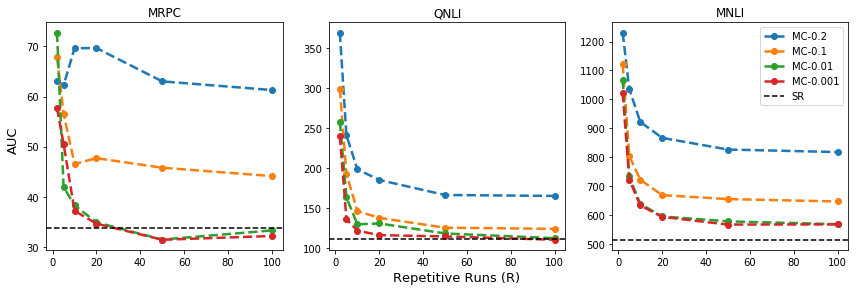

In [3]:
datasets = ['MRPC', 'QNLI', 'MNLI']

fig, axes = plt.subplots(1, len(datasets), figsize=[12,4])

for i, ds in enumerate(datasets):
    data = np.load(f'saved_data/{ds}/bert-base-uncased-mc_dropout.npy', allow_pickle=True).item()
    plot(axes[i], data, title=ds)

fig.text(0.53, 0.01, 'Repetitive Runs (R)', ha='center', fontsize=13)
fig.text(0.01, 0.50, 'AUC', va='center', rotation=90, fontsize=13)

plt.tight_layout(rect=[0.02, 0.02, 1, 1])
save_fig('figs/mcd.pdf')